Import Essential Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Load Datasets

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

Merge Datasets

In [3]:
data = transactions.merge(customers, on="CustomerID")

Aggregate data for clustering

In [4]:
customer_data = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Region": lambda x: x.mode()[0]
}).reset_index()

One-hot encode & Standardize numerical features

In [5]:
customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data.iloc[:, 1:])

Perform KMeans clustering

In [6]:
n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_data_scaled)

Compute Clustering Metrics

In [7]:
db_index = davies_bouldin_score(customer_data_scaled, customer_data["Cluster"])
silhouette = silhouette_score(customer_data_scaled, customer_data["Cluster"])
inertia = kmeans.inertia_

Cluster Centroids & Distributions

In [16]:
centroids = kmeans.cluster_centers_
cluster_counts = customer_data["Cluster"].value_counts()

Metric Scores

In [10]:
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Inertia (WCSS): {inertia:.4f}")
print("Cluster Distribution:\n", cluster_counts)
print("Cluster Centroids:\n", centroids)

Davies-Bouldin Index: 0.9476
Silhouette Score: 0.4319
Inertia (WCSS): 373.3513
Cluster Distribution:
 Cluster
3    70
1    51
2    41
0    37
Name: count, dtype: int64
Cluster Centroids:
 [[ 1.42236352  1.45494371 -0.14309891 -0.22776818 -0.17575016]
 [-0.11003898 -0.13801175 -0.57928445 -0.54831888  1.54041597]
 [-0.31561505 -0.23731406 -0.57928445  1.82375628 -0.6491753 ]
 [-0.48678922 -0.52949202  0.83698327 -0.54831888 -0.6491753 ]]


Visualization

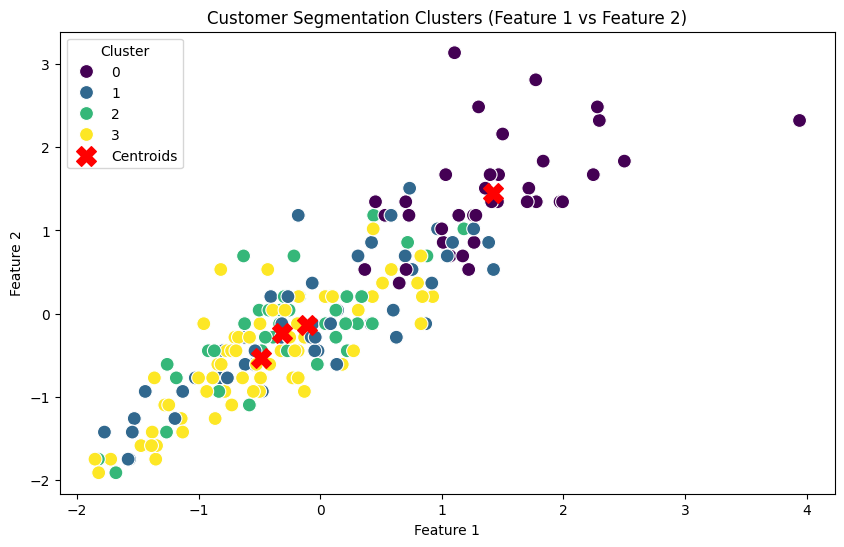

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data_scaled[:, 0],
    y=customer_data_scaled[:, 1],
    hue=customer_data["Cluster"],
    palette="viridis",
    s=100
)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("Customer Segmentation Clusters (Feature 1 vs Feature 2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_14100\2029202264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=customer_data["Cluster"], y=customer_data["TotalValue"], palette="viridis")


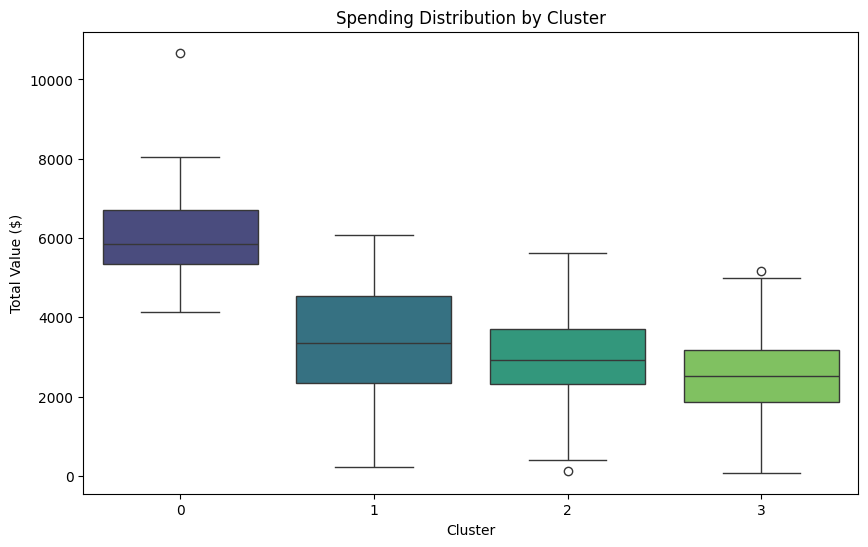

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_data["Cluster"], y=customer_data["TotalValue"], palette="viridis")
plt.title("Spending Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Value ($)")
plt.show()


C:\Users\rishi\AppData\Local\Temp\ipykernel_14100\2572287176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


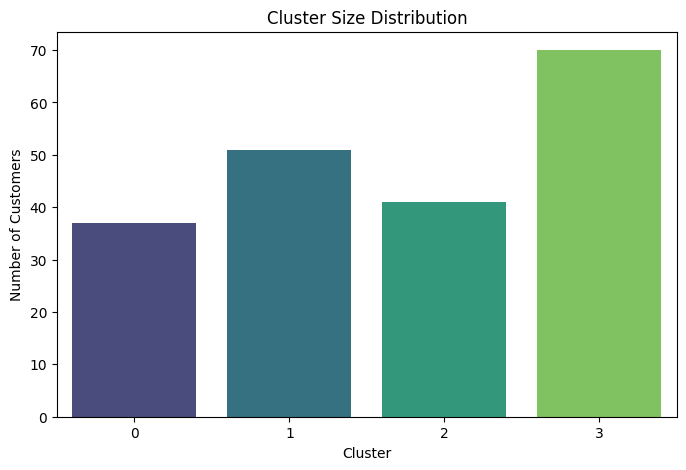

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

In [15]:
customer_data[["CustomerID", "Cluster"]].to_csv("AngaraVenkataSaiSingu_Rishik_Clustering.csv", index=False)